# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Create random integer array between 2 and 4 for an array size of 3x2

In [2]:
data=np.random.randint(2,4,size=(3,2))
data

array([[2, 2],
       [2, 2],
       [2, 2]])

# Creating a Dataframe

In [3]:

df=pd.DataFrame(data,['Apples','Bananas','Carrots'],['price_per_lb','weight'])

In [4]:
df


,price_per_lb,weight
Apples,2,2
Bananas,2,2
Carrots,2,2


# Calculate  total.

In [5]:
df['total']=df['price_per_lb']*df['weight']

In [6]:
df

,price_per_lb,weight,total
Apples,2,2,4
Bananas,2,2,4
Carrots,2,2,4


In [7]:
#Adding a new column "family size"
# run this code 1 time only. Python intrepreter keeps inserting each time you run the code and will throw error.
# To re-run code restart kernel.
df.insert(3,'family size',[2,4,3])

In [8]:
df

,price_per_lb,weight,total,family size
Apples,2,2,4,2
Bananas,2,2,4,4
Carrots,2,2,4,3


#### Update the total to reflect the increase in purchase depending on the family size.

In [9]:
#lambda function for updating the new total.
#Formula(size of family member * total) 
df['total']=df['family size'].apply(lambda x: x*df['total'])

In [10]:
df

,price_per_lb,weight,total,family size
Apples,2,2,8,2
Bananas,2,2,16,4
Carrots,2,2,12,3


# Bar plot in Matplotlib

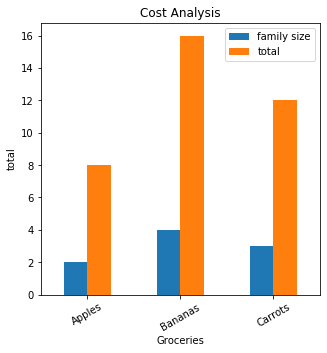

In [11]:
ax=df[['family size','total']].plot(kind='bar',figsize=(5,5),legend=True,rot=30)
ax.set_xlabel("Groceries")
ax.set_ylabel("total")
ax.set_title('Cost Analysis')
plt.show()


# Bar plot in Seaborn

```pd.melt()```

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

In [12]:
# Value_name is renamed to Final_total
df_melt=df.reset_index().melt(id_vars='index',value_vars=['family size','total'],value_name='Final_total')

In [13]:
df_melt

,index,variable,Final_total
0,Apples,family size,2
1,Bananas,family size,4
2,Carrots,family size,3
3,Apples,total,8
4,Bananas,total,16
5,Carrots,total,12


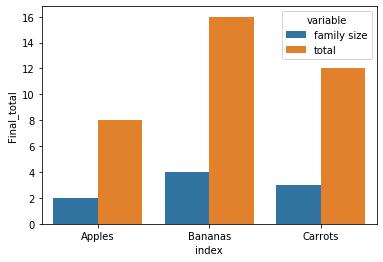

In [14]:
sns.barplot(x='index',y='Final_total',hue='variable',data=df_melt)

Total increases with increase in size of family members
